# Loading packages

In [1]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [2]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,3.783199e+07,1.711147e+07,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4.669179e+06,9.278377e+05,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,2.810119e+07,1.111696e+07,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8.238474e+06,7.519183e+06,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,3.546565e+07,8.545184e+06,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80
5,C_494,0,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,...,NaN,7.953387e+04,8.484770e+04,8.061511e+04,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00
6,C_300,0,GmbH,10969,68200,1991,2.0,GKV,1.508435e+08,1.479894e+08,...,NaN,6.657375e+08,8.479909e+07,3.142807e+07,11542490.91,326731.07,8000.0,4.007555e+07,-8.337054e+06,-34594274.52
7,C_453,0,GmbH,16792,78100,1991,NaN,GKV,2.843420e+08,2.843420e+08,...,NaN,2.883814e+09,4.229090e+08,4.312550e+08,21696000.00,448000.00,NaN,5.861770e+08,-7.339750e+08,-95826000.00
8,C_924,0,GmbH,13125,86101,1991,283.0,GKV,9.811591e+06,9.681040e+06,...,NaN,2.032968e+07,7.366730e+06,5.421665e+06,322573.88,372298.68,NaN,4.369386e+05,-1.879056e+06,-13729379.17
9,C_976,0,GmbH,12681,71122,1999,NaN,GKV,1.384595e+05,1.384595e+05,...,NaN,1.552805e+06,4.966969e+05,4.500943e+04,35726.57,NaN,NaN,1.947540e+05,3.318306e+05,-798859.83


# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [3]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [4]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing']

## Missing values

Overview of missing values in the data

In [5]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          669
bonds_payables_lt          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
sales                        1
earn_from_op                 1
cf_financing                 1
annual_profit                1
total_assets                 1
cf_investment                1
current_assets               1
cf_operating                 1
sector                       0
zip_code                     0
legal_form                   0
default                      0
year_inc

In [6]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

In [16]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

### Age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

\begin{equation*}
Age = Todays\ Year - Year\ Inc.
\end{equation*}

In [7]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

#For the test data
df_test['age_num'] = datetime.datetime.now().year - df_test["year_inc"]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [9]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

# For the test data
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_test["age_num"].quantile(i/100))

age_th = df_test["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_test.loc[df_test["age_num"] > age_th,"age_num"] = age_th

In [12]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(9.999, 13.0]","(13.0, 16.0]","(16.0, 20.0]","(20.0, 23.0]","(23.0, 25.0]","(25.0, 29.0]","(29.0, 32.0]","(32.0, 42.4]","(42.4, 66.0]","(66.0, 158.102]"
default,,,,,,,,,,
0,69,61,75,78,36,67,64,54,65,62
1,5,1,3,6,4,0,7,5,3,4


In [13]:
#Flave - habe age cat so transformiert, dass man sie unten in der regression benutzen kann
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 4, inclusive=True),
     df_train['age_num'].between(5, 9, inclusive=True),
     df_train['age_num'].between(10, 29, inclusive=True),
     df_train['age_num'].between(30, np.inf, inclusive=True)], 
    [1,2,3,4])

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,3,4
default,,
0,386,245
1,19,19


### Cash

In [14]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.5))
df_train['cash'] = sci.stats.mstats.winsorize(df_train['cash'], limits =[0.0, 0.015])
#df_train['cash'] = np.log(df_train['cash'])
# print(df_train['cash'].isnull().sum())
# print(df_train['cash'].describe())
# print(df_train['cash'].value_counts())
# plt.boxplot(df_train['cash'])
# plt.show()
df_test['cash'] = df_test['cash'].replace(np.nan, np.quantile(df_test['cash'].dropna(),.5))

### Working Capital Ratio
liquidity ratios measuring a companies ability to meet its short term dept obligations

\begin{equation*}
Working\ Capital\ Ratio = \frac{Current\ Assets}{Current\ Liabilities}
\end{equation*}


In [15]:
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.02])
df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
# print(df_train.wc_ratio)
# print(df_train.wc_ratio.describe())

### Ebit Margin

\begin{equation*}
EBIT\ Margin = \frac{EBIT}{Sales}
\end{equation*}


In [17]:
df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])
# print(df_train['profit_margin'].isnull().sum())
# print(df_train['profit_margin'].describe())
# print(df_train['profit_margin'].value_counts())
df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']

### Operating Cashflow Ratio 


\begin{equation*}
Operating\ Cashflow\ Ratio = \frac{Operating\ Cashflow}{Sales}
\end{equation*}


In [19]:
cf_pos = np.where(df_train['cf_operating'] > 1, df_train['cf_operating'], 0)
cf_neg = np.where(df_train['cf_operating'] < -1, df_train['cf_operating'], 0)
df_train['ocf_ratio'] = df_train['cf_operating']/df_train['sales']
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.01, 0.02])
# print(df_train.ocf_ratio)
# print(df_train.ocf_ratio.describe())
# print(df_train['ocf_ratio'].value_counts())
df_test['ocf_ratio'] = df_test['cf_operating']/df_test['sales']

### Profit Margin

\begin{equation*}
Profit\ Margin = \frac{Gross\ Profit}{Sales}
\end{equation*}


In [18]:
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.02])
# print(df_train['profit_margin'].isnull().sum())
# print(df_train['profit_margin'].describe())
# print(df_train['profit_margin'].value_counts())
df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.5))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']

### Equity Ratio 
First predict NaN's for total equity

In [20]:
# Check for correlation to get relevant variables for regression
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))

cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

# Split training and prediction dataset
y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

#Train model to fit dataset and predict missing values from column total equity and replace them
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

# Replace the missing values with predicted values
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred
# print(df_train['total_equity'].isnull().sum())
# print(df_train['total_equity'].describe())
# print(df_train['total_equity'].value_counts())

corr total eqity x total result: 0.8677428854384167
corr total eqity x total assets: 0.7973909460204517
corr total eqity x operating cash flow: 0.8165188337701584
[ 804154.57039481  826770.37433689  750108.44000769 2034060.76386614
  906958.71620785  757800.98860179  694739.75133315  777633.44217635
 1031927.82907442  707250.99306169  798206.66922867  753555.95951813
  938481.58223852  838818.88678532  728338.08877872  658229.22939661
  757045.94589861 3707034.78681171  430054.79880165  809294.10299163]


\begin{equation*}
Equity\ Ratio = \frac{Total\ Equity}{Total\ Assets}
\end{equation*}


In [22]:
df_train['equity_ratio'] = np.where(df_train['total_equity'] > 1, df_train['total_equity']/df_train['total_assets'], 0)
df_train['equity_ratio'] = sci.stats.mstats.winsorize(df_train['equity_ratio'], limits =[0.0, 0.02])
# print(df_train.equity_ratio)
# print(df_train.equity_ratio.describe())
# print(df_train.equity_ratio.value_counts())
df_test['equity_ratio'] = np.where(df_test['total_equity'] > 1, df_test['total_equity']/df_test['total_assets'], 0)

### Debt-to-Equity Ratio  


\begin{equation*}
Debt-to-Equity\ Ratio = \frac{Total\ Debt}{Total\ Equity}
\end{equation*}


In [23]:
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])
# df_train['debt_to_equity'] = np.where(df_train['debt_to_equity'] > 0, np.log(df_train['debt_to_equity']), 0)

# print(df_train.debt_to_equity.describe())
# print(df_train.debt_to_equity)
# print(df_train.debt_to_equity.value_counts())
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']
df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

### Return on Assets

\begin{equation*}
ROA = \frac{Annual\ Profit}{Total\ Assets}
\end{equation*}


In [24]:
df_train['roa'] = df_train['annual_profit']/df_train['total_assets']
df_test['roa'] = df_test['annual_profit']/df_test['total_assets']

### Boxplots for Ratios

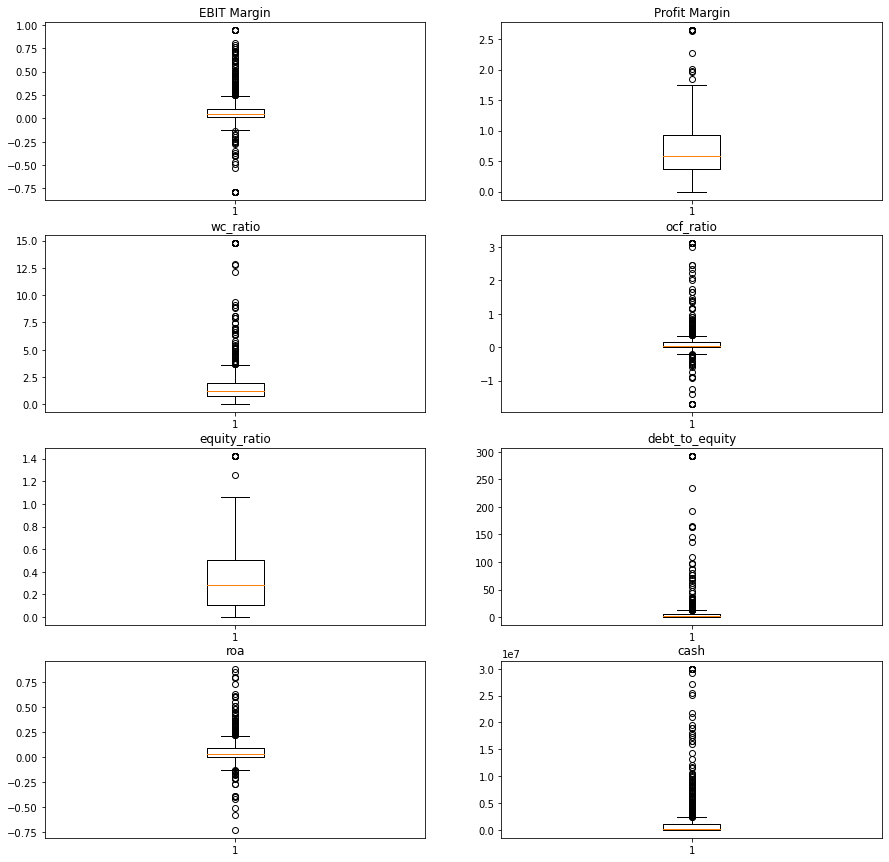

In [25]:
f, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0,0].boxplot(df_train['ebit_margin'])
ax[0,0].set_title('EBIT Margin')
ax[0,1].boxplot(df_train['profit_margin'])
ax[0,1].set_title('Profit Margin')
ax[1,0].boxplot(df_train['wc_ratio'])
ax[1,0].set_title('wc_ratio')
ax[1,1].boxplot(df_train['ocf_ratio'])
ax[1,1].set_title('ocf_ratio')
ax[2,0].boxplot(df_train['equity_ratio'])
ax[2,0].set_title('equity_ratio')
ax[2,1].boxplot(df_train['debt_to_equity'])
ax[2,1].set_title('debt_to_equity')
ax[3,0].boxplot(df_train['roa'])
ax[3,0].set_title('roa')
ax[3,1].boxplot(df_train['cash'])
ax[3,1].set_title('cash')
plt.show()

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [28]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        #print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

In [29]:
dictionary_logit = pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")
dictionary_logit

,P-Value,NAs
cash,0.037583,0
year_inc,0.055778,0
total_equity,0.084170,0
wc_ratio,0.090740,0
profit_margin,0.143273,0
gross_profit,0.157463,0
age_cat,0.170428,0
roa,0.220524,0
cf_operating,0.242346,1
bank_liabilities_lt,0.245019,544


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [35]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue


In [36]:
dictionary_mannu = pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")
dictionary_mannu

,Test statistic,P-Value,NAs
cash,7387.0,0.000036,0
total_equity,8078.0,0.000378,0
trade_receivables_lt,8295.0,0.000735,644
trade_payables_lt,8433.0,0.001102,664
bonds_payables_lt,8470.0,0.001226,668
bonds_payables_st,8470.0,0.001226,668
monetary_current_assets,8691.0,0.002271,0
bonds_payables_mt,8853.0,0.003492,663
equity_ratio,8901.5,0.003953,0
result_from_ord_bus,8910.0,0.004045,0


In [42]:
#merge both results together
summary = pd.concat((dictionary_logit.iloc[:,0],dictionary_mannu.iloc[:,1:]),axis=1,)
summary.columns = ["P-Value Univ. Logit","P-Value MannU","NAs"]
summary

,P-Value Univ. Logit,P-Value MannU,NAs
cash,0.037583,0.000036,0
year_inc,0.055778,0.255359,0
total_equity,0.084170,0.000378,0
wc_ratio,0.090740,0.009051,0
profit_margin,0.143273,0.070283,0
gross_profit,0.157463,0.011038,0
age_cat,0.170428,0.083892,0
roa,0.220524,0.210278,0
cf_operating,0.242346,0.006266,1
bank_liabilities_lt,0.245019,0.073125,544


### Categorical Variables

In [43]:
catvar = [i for i in list(df_train.columns)[1:] if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.24  11.76       15       2   17    2.54
OHG                      100.00   0.00        4       0    4    0.60
KG                        80.00  20.00        4       1    5    0.75
GmbH & Co. KG             91.67   8.33       88       8   96   14.37
GmbH                      95.04   4.96      460      24  484   72.46
Genossenschaft           100.00   0.00       15       0   15    2.25
Freiberufler              80.00  20.00        4       1    5    0.75
Einzelfirma               88.89  11.11        8       1    9    1.35
BGB-Gesellschaft         100.00   0.00        4       0    4    0.60
AG                        96.43   3.57       27       1   28    4.19

Variable:  type_pl
---------

# Our Variables of interest
In this section we want to focus on our variables of interest, which are mainly choosen because of economic reasoning. These are:

- Age
- Cash
- Profit Margin
- EBIT Margin
- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt-to-Equity Ratio
- Return on Assets

## Results of both univariate Tests

As already stated before, economic reasoning is our main argument to choose a variable for our regression. Nevertheless it is important to see the results of the univariate tests in the section before.

In [44]:
col_list = ["age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
summary.loc[col_list,:]

,P-Value Univ. Logit,P-Value MannU,NAs
age_num,0.722388,0.256055,0
cash,0.037583,0.000036,0
profit_margin,0.143273,0.070283,0
ebit_margin,0.567159,0.284780,0
wc_ratio,0.090740,0.009051,0
ocf_ratio,0.444895,0.336994,0
equity_ratio,0.544274,0.003953,0
debt_to_equity,0.691734,0.199307,0
roa,0.220524,0.210278,0


## Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset.

In [45]:
col_list = ["default","age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_num,cash,profit_margin,ebit_margin,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0,121.0,10297047.50,0.361114,0.061157,5.142587,0.065368,0.738567,0.352444,1.494000e-01
1,0,45.0,926383.75,1.104725,0.027363,0.663710,-1.713468,0.389698,1.560542,9.655827e-02
2,0,59.0,9146283.79,2.640070,0.023240,3.328108,2.471134,0.000937,163.778649,-2.540307e-17
3,0,49.0,6890565.23,2.640070,0.133260,3.193566,0.391307,0.592532,0.236311,2.980723e-02
4,0,113.0,5036615.09,1.135876,0.489225,0.102055,1.178664,0.417496,1.329259,2.607926e-02
...,...,...,...,...,...,...,...,...,...,...
664,0,44.0,31000.00,0.506472,0.013336,0.835583,0.009571,0.182336,4.484386,-2.783753e-03
665,0,21.0,252537.31,0.446851,0.047281,1.213142,-0.083731,0.341823,1.925494,1.555806e-01
666,0,21.0,573037.66,1.000000,0.298976,0.041927,0.032679,0.000000,0.000000,1.289209e-02
667,0,14.0,5652.17,1.049012,0.053456,0.615002,0.137266,0.000000,0.000000,6.375280e-02


### Age

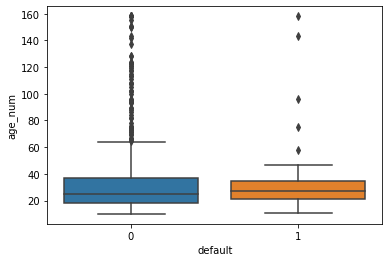

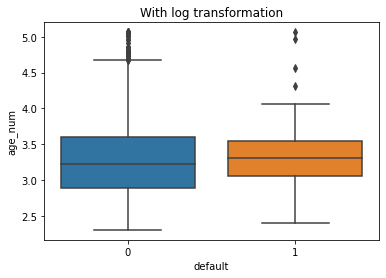

<Figure size 432x288 with 0 Axes>

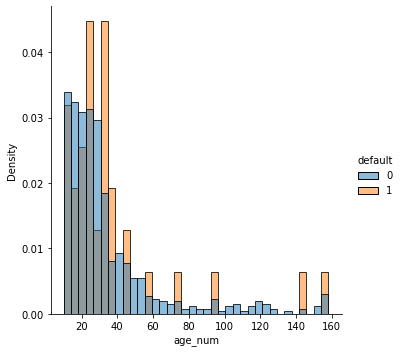

In [46]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

### Cash

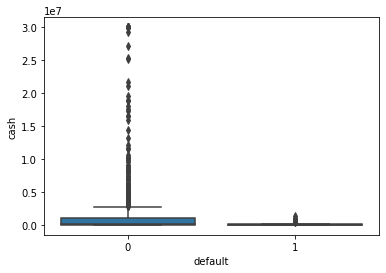

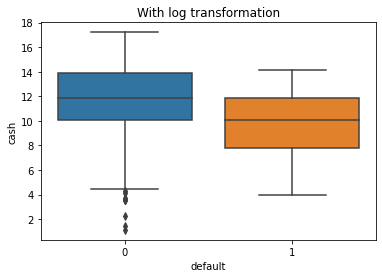

<Figure size 432x288 with 0 Axes>

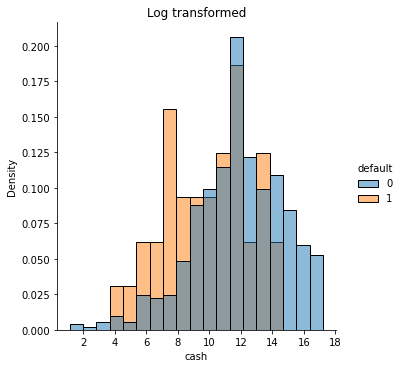

In [47]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x=np.log(df_train["cash"]),hue="default",stat="density",common_norm=False)
plt.title("Log transformed");

### Profit Margin

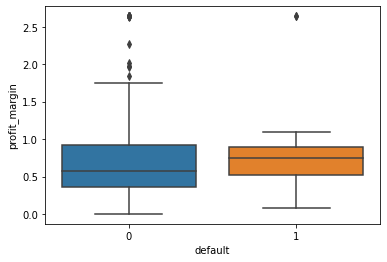

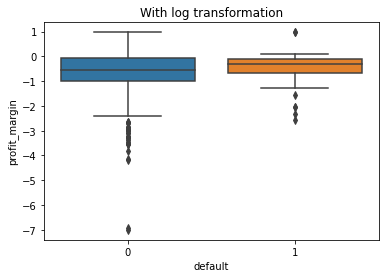

<Figure size 432x288 with 0 Axes>

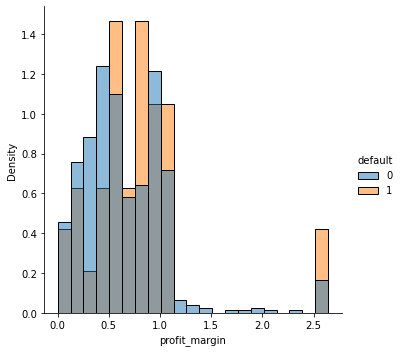

In [48]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

### Ebit Margin

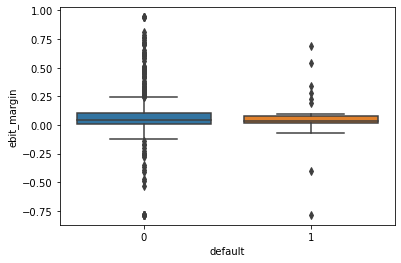

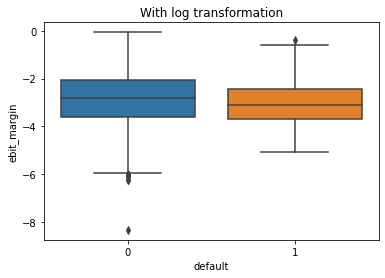

<Figure size 432x288 with 0 Axes>

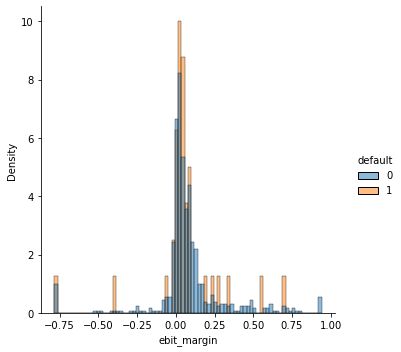

In [49]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

### Working Capital Ratio

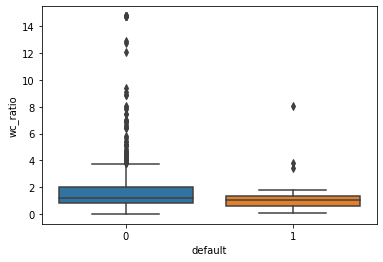

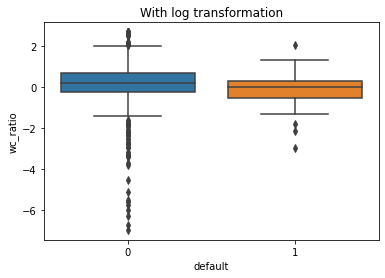

<Figure size 432x288 with 0 Axes>

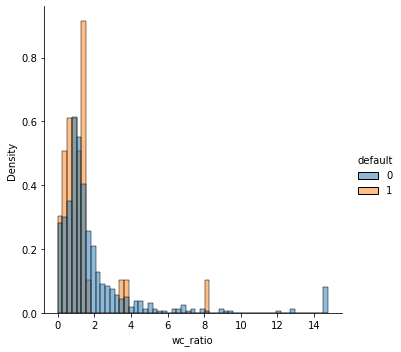

In [50]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

### Operating Cash Flow Ratio

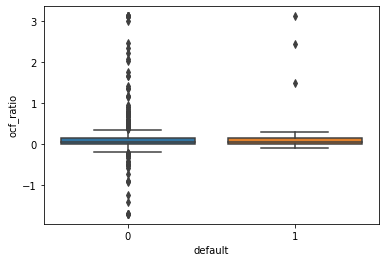

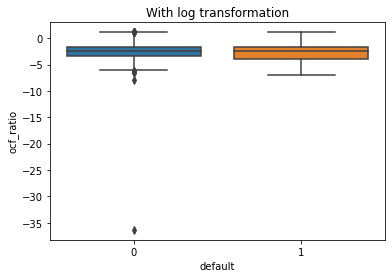

<Figure size 432x288 with 0 Axes>

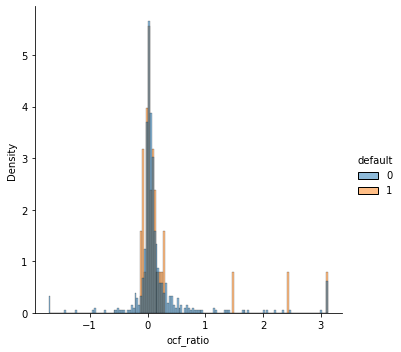

In [51]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

### Equity Ratio 

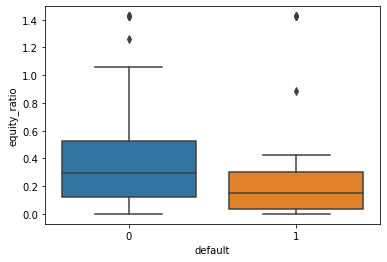

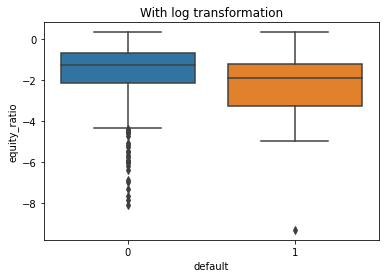

<Figure size 432x288 with 0 Axes>

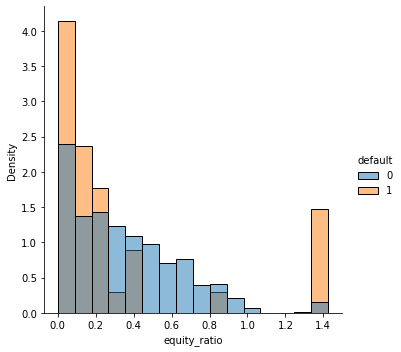

In [52]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

### Debt-to-Equity Ratio

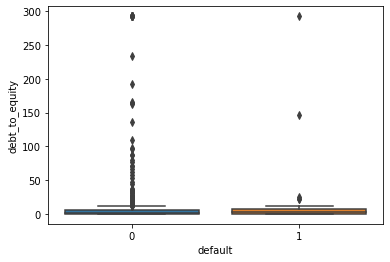

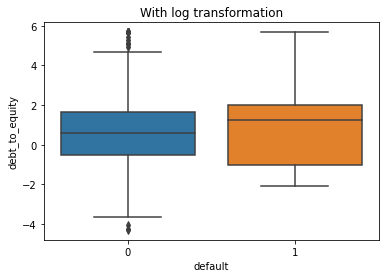

<Figure size 432x288 with 0 Axes>

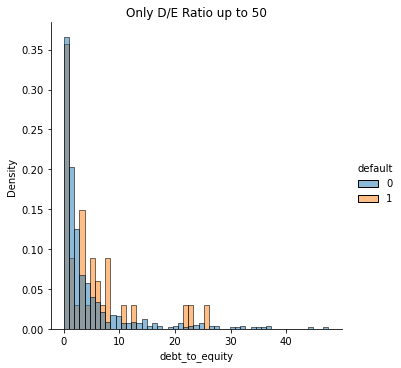

In [53]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
data = df_train[df_train["debt_to_equity"] < 50]
sns.displot(data,x="debt_to_equity",hue="default",stat="density",common_norm=False)
plt.title("Only D/E Ratio up to 50");

## Multivariate Analysis - Correlation Matrix/Heatmap

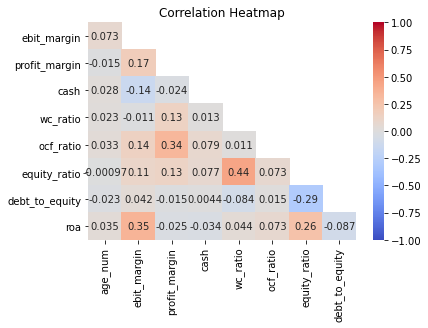

,age_num,ebit_margin,profit_margin,cash,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity
ebit_margin,0.073242,1.000000,0.174436,-0.138188,-0.011095,0.144134,0.109361,0.041610
profit_margin,-0.015167,0.174436,1.000000,-0.023509,0.134763,0.337587,0.131763,-0.015116
cash,0.028072,-0.138188,-0.023509,1.000000,0.012771,0.078503,0.076800,0.004397
wc_ratio,0.023143,-0.011095,0.134763,0.012771,1.000000,0.011166,0.438545,-0.084161
ocf_ratio,0.032502,0.144134,0.337587,0.078503,0.011166,1.000000,0.073305,0.014827
equity_ratio,-0.000973,0.109361,0.131763,0.076800,0.438545,0.073305,1.000000,-0.293038
debt_to_equity,-0.022845,0.041610,-0.015116,0.004397,-0.084161,0.014827,-0.293038,1.000000
roa,0.035019,0.353960,-0.024992,-0.034476,0.043748,0.073164,0.260223,-0.086948


In [54]:
col = ['age_num','ebit_margin', 'profit_margin', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']
data = df_train[col]
#print(data.head(10))
#print(data.info())

df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = pd.DataFrame(df_corr.iloc[1:,:-1].copy())

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

corr

# Our Logit Regression

In [55]:
mdl1 = sm.Logit.from_formula('default ~ age_num + cash + profit_margin + ebit_margin + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.086    
Dependent Variable: default          AIC:              286.5161 
Date:               2021-01-06 13:42 BIC:              331.5590 
No. Observations:   668              Log-Likelihood:   -133.26  
Df Model:           9                LL-Null:          -145.83  
Df Residuals:       658              LLR p-value:      0.0028103
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        -2.5558   0.4563 -5.6017 0.0000 -3.4501 -1.6616
age_num           0.0039   0.0054  0.7175 0.4731 -0.0067  0.0145
cash             -0.0000   0.0000 -1.9742 0.0484 -0.0000 -0.0000
profit_margin     0.4235   0.4091  1.0354 0.3005 -

In [56]:
y = df_train["default"]
X = df_train[['age_num','cash', 'profit_margin', 'ebit_margin', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.199488
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.086    
Dependent Variable: default          AIC:              286.5161 
Date:               2021-01-06 13:42 BIC:              331.5590 
No. Observations:   668              Log-Likelihood:   -133.26  
Df Model:           9                LL-Null:          -145.83  
Df Residuals:       658              LLR p-value:      0.0028103
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -2.5558   0.4563 -5.6017 0.0000 -3.4501 -1.6616
age_num           0.0039   0.0054  0.7175 0.4731 -0.0067  0.0145
cash             -0.0000   0.0000 -1.9742 0.0484 -0.0000 -0.0000
profit_margin     0.4235   0.4091  1.0354 0.3005 -0.3782  1.2253
ebit_margin      -0.8877   0.7680 -1.1559 0.2477 -2.3930  0.6175
wc_ratio         -0.2313   0.1394 -1.6592 0.0971 -0.5045  0.0419
ocf_ratio         0.1299   0.2829  0.4592 0.6461 -0.4245  0.6843
equity_ratio      0.3932   0.5808  0.6770 0.4984 -0.7452  1.5315
debt_to_equity    0.0008   0.0035  0.2297 0.8183 -0.0061  0.0077
roa              -1.3083   1.4215 -0.9203 0.3574 -4.0944  1.4779
================================================================

"""

In [57]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
419,1,40.26
358,0,36.01
15,0,25.69
544,0,22.87
212,1,22.36
...,...,...
440,0,0.00
432,0,0.00
410,0,0.00
394,0,0.00


In [58]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,3.71
43,1,8.30
69,1,7.30
104,1,12.13
114,1,5.04
120,1,6.44
128,1,10.48
139,1,8.99
150,1,10.73
198,1,7.38


In [59]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.199589
         Iterations 11
Mean Absolute Error: 0.1 .


Out sample: 
AUC (LY):   0.7132936507936507
GINI (LY):  0.4265873015873014


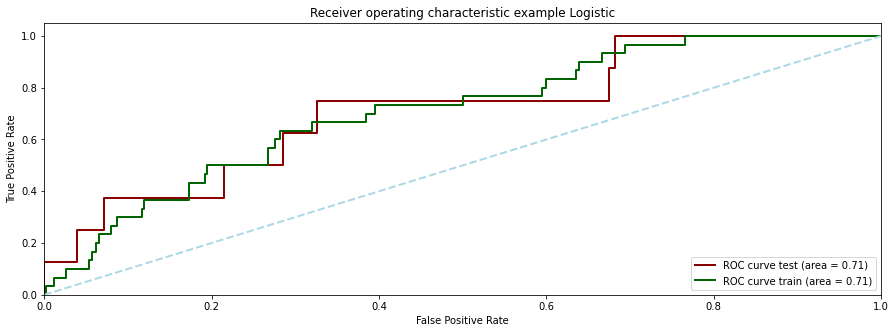

In [60]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.7075605680868838
GINI L1:  0.41512113617376767
AUC L2:   0.7075605680868838
GINI L2:  0.41512113617376767
Splitted Logit Regression
Out sample: 
AUC Test Sample:   0.7132936507936507
GINI Test Sample:  0.4265873015873014


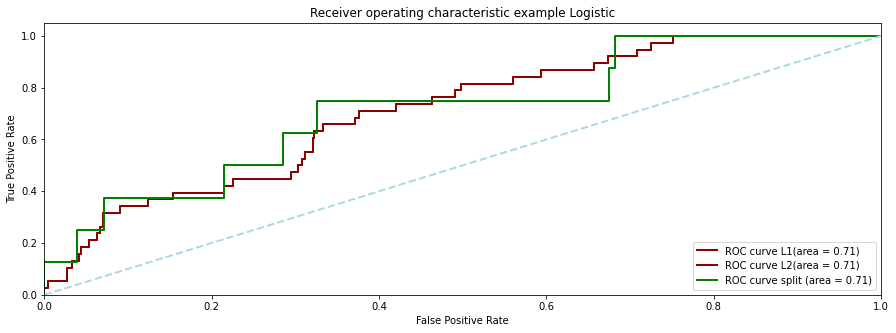

In [61]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

Our out of sample Gini here highly depends on the random_state we define in out test and train split. Thus multiple different random states are here simulated. Also the test size here is increased to 0.33 as this will be similiar to the sizes of our train (668 firms) and test (330) firms.

In [62]:
# Generate random numbers for different states
#np.random.seed(220497)
random_numbers = np.random.randint(0,1000000,10000)
dictionary_random_test = dict()

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_random_test[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_random_test = pd.DataFrame.from_dict(dictionary_random_test,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])

Optimization terminated successfully.
         Current function value: 0.195018
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197081
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196404
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.192795
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185789
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197062
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193192
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196317
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196493
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196821
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197019
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201218
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193922
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194215
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190056
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196569
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200841
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199570
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193045
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194741
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190737
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185219
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.187666
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199186
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188784
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184821
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193844
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.188191
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198756
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191055
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192971
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198548
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198269
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190137
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193794
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189857
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197497
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199306
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197239
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193127
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196724
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195232
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193704
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195938
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196013
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.188037
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192882
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.182491
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194236
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194839
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194271
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195723
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198365
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200968
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.187902
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193049
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199959
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186528
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186878
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195444
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184004
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188490
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196206
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191108
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199134
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193983
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195779
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200876
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192696
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195624
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193984
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195822
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196877
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192108
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191380
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193992
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193040
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194713
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190097
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190814
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194386
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.188434
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192263
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185927
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190554
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186845
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195302
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198902
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188113
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193373
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191112
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186251
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197155
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195390
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192142
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197102
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195464
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183717
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.185621
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.199313
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191592
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196796
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193705
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.186099
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197730
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183583
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.192367
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193901
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.187447
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.191627
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188967
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183931
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.179047
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190928
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196220
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197670
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199614
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200030
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186599
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194255
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192021
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186914
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193410
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195699
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185883
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192682
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.187456
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192582
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196930
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194246
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.191281
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196231
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195001
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190068
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189115
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.192320
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191343
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191247
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.185047
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.198619
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187289
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190796
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183857
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201256
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196712
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190321
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194440
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190762
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195284
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197311
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192134
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190244
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199722
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.192130
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.191959
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.185343
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.187060
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.193426
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185821
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193961
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198350
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189200
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197302
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194636
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188418
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192648
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196539
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184536
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191303
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195497
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199909
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188421
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183800
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194231
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186147
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.192584
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195576
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192956
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198435
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188082
         Iterations 12
Optimization terminated successfully.
         Cur

Optimization terminated successfully.
         Current function value: 0.193615
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193281
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193793
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194907
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183580
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192308
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200857
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197531
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197246
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.183362
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194555
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193750
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194774
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186300
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195441
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194068
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186557
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192403
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196046
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193388
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185985
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187965
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196211
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190291
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195542
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194641
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187536
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.183376
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188952
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190239
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192616
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188203
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193214
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198239
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193139
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184665
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200692
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189041
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193991
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192739
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191436
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198280
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194696
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191499
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194757
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192832
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191080
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196051
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187335
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189676
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192474
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190584
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191818
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

         Current function value: 0.197536
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197302
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.199087
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189702
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196652
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191295
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199128
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195301
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191677
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193119
         Iterations 11
Optimiza

Optimization terminated successfully.
         Current function value: 0.196622
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193476
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196562
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195945
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189772
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196361
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199197
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197927
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197985
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.189167
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193215
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188132
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.181846
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.189276
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203910
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192064
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196516
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196973
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193372
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190414
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190866
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192203
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.189142
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197413
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190170
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198064
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194546
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.187105
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193329
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190945
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199350
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186374
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190035
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183821
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191058
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.201497
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.192989
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.186817
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198801
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190346
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.167760
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.192501
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193326
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194356
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191709
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191862
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200015
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192134
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191969
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186481
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187555
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198198
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192942
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196445
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.186566
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199260
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195120
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184170
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199438
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191206
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191762
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198260
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194714
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.202242
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198104
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189604
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185029
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197381
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195575
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192749
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190781
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192850
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193439
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190876
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197926
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193296
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188325
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190821
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192856
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194418
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197964
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196759
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.200152
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194248
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195386
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198320
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194130
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187340
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187115
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197587
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193076
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197082
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198380
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191526
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196543
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192072
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194777
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195556
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193631
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.187911
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.192288
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189730
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198575
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190429
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191172
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190246
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195924
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194984
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197372
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201639
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189361
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198747
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185237
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192890
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190672
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192519
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193726
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200086
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192162
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195532
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195019
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195441
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187872
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191933
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186721
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194899
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194148
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198479
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199747
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201955
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189811
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198368
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190620
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197324
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186729
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.192487
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189233
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193888
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198492
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187128
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198156
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191424
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196820
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188506
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194424
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190170
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.184303
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188591
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198509
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193886
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195971
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195002
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186796
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197055
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189219
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186102
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199968
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196488
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193194
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.186279
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195728
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198008
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.195358
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193282
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193701
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184859
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.195669
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194960
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191057
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199510
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197926
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194598
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196941
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188300
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186949
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196605
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199119
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190860
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192865
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191468
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196618
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186309
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.201458
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197114
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195337
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193034
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196689
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193433
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193204
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.190740
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192409
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194596
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199324
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195402
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199427
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.183716
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195825
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189536
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.182067
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197097
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192516
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192497
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190778
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199304
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189602
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193725
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199614
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.187446
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188782
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.189516
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190674
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194643
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191169
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192275
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190288
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.177079
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.192682
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190516
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196159
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202258
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196152
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191399
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187244
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189337
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190695
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197562
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193273
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197523
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199887
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195326
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.182783
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192622
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196204
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183626
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.182807
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188481
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193332
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190557
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194920
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200878
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185030
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193613
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190525
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.184108
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194571
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185868
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190255
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196116
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201500
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194055
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195034
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199038
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196174
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193983
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194455
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193385
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187531
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197993
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189449
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196796
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188549
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196078
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190639
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196104
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200482
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190471
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.180785
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191591
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.187657
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.193240
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197029
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198444
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194564
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194293
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191062
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193538
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192054
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195052
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199378
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197814
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193339
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194746
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190687
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196186
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198543
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192875
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196360
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193515
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191886
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200495
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201663
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198013
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195974
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194693
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193543
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197804
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193677
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.199727
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196831
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195176
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187493
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195658
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196670
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195553
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188057
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201565
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.190227
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198519
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189527
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193397
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192886
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198086
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191736
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.182739
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.185288
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.184709
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192149
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190829
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.176540
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.194540
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193025
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194485
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190698
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192873
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.189673
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.187824
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193985
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194976
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190303
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196073
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193899
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192945
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200519
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193764
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193135
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197257
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192814
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195921
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.203254
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.187141
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190688
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192225
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.198630
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186721
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187795
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191091
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196048
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197421
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194336
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194325
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197717
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191592
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190112
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191674
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190306
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196790
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192942
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192530
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199105
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192386
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197749
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195061
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196244
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195771
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202826
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197732
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194564
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201240
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201092
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193235
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.181958
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196698
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191796
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196926
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189100
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189205
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194037
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189521
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197953
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192563
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193526
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194732
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187070
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193522
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194107
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193745
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188649
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.192946
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198978
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196714
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190595
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192541
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188887
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194199
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.186743
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.183583
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191529
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195805
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188971
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198475
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194717
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.186802
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194024
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197844
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190083
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.190925
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191914
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195260
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191250
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192831
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.186984
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189404
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196221
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196572
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193845
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189818
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198374
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197543
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191044
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199130
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193260
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193065
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193430
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.199688
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194103
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191321
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194491
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191544
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190076
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198072
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201545
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196713
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196839
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185403
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190816
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197696
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195382
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190504
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194333
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195854
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201165
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.190202
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188945
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197839
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189032
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193477
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195886
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189950
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197202
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192294
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.198099
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185568
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191500
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194586
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184105
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202480
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191623
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195794
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197935
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193754
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196952
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192409
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187067
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190503
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197786
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196936
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192995
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192049
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194969
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197261
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195512
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201803
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193063
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193864
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197293
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190259
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196035
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.186992
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197329
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195587
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195826
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191714
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191299
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192954
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191066
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196914
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.186452
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194632
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194840
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200591
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190930
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194583
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199260
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191573
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188709
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.195079
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193460
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197204
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195514
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189183
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196533
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198488
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194456
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183300
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.190789
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194875
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192678
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198336
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195052
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188822
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193212
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197168
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196081
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190656
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185975
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195756
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190478
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191889
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195663
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189370
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184938
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193057
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194384
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189123
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195336
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.174042
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187848
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192492
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192152
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189234
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.186439
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189806
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189616
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195856
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200296
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194307
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200292
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195638
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194008
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.198636
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188833
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198735
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197571
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.184643
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192406
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200862
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197260
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196104
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197154
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190945
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197518
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190007
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188833
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194597
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188238
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188821
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191085
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194800
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190455
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194532
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193664
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193752
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190804
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198799
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192098
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193257
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.188690
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197083
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188920
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.187495
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.188567
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188635
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196711
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196315
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191189
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197950
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187136
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194067
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200474
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187663
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186874
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193438
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189665
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196264
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.189558
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192721
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198452
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197438
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204328
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198520
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192441
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190713
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191833
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194472
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190801
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197329
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.179971
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.186735
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193189
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196616
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197413
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191116
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200792
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188707
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194457
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193749
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185429
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194369
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194998
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191429
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198302
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191261
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186388
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198003
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191152
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.175365
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198142
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187362
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197774
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197042
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.186398
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191712
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193657
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195873
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194812
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197061
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191724
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.189226
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198571
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.188900
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192410
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194640
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194838
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200846
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186976
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197895
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191946
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195009
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197993
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195793
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196493
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194004
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190641
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198860
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.188552
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195332
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188874
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196771
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189476
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188156
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190584
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195455
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198314
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196894
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200340
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192189
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.192640
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197826
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193210
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195381
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188853
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195670
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191912
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191925
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189651
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191766
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193345
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191424
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197501
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.188547
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192634
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189252
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186668
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195895
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.198195
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191138
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.192041
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191106
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187830
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193362
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189123
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192291
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189520
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.186350
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187744
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197216
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197185
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183347
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199221
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190674
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190230
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194610
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.190529
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199161
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191213
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194152
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197719
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196373
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193045
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191521
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192896
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.188825
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194987
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189647
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199776
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194187
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.177404
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191498
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194931
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197538
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194748
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192667
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190770
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192345
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200076
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197175
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189656
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193429
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198589
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197540
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194311
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190508
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187523
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186867
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193176
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187496
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190728
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197430
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197466
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194250
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195440
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193950
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186921
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195305
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193262
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194592
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.186221
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.189312
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192467
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189564
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.189110
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186314
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191951
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193551
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197024
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191455
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.195178
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.179801
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195255
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188561
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190755
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199378
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196273
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194219
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191233
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.202281
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196114
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196297
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189379
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202239
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195179
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193944
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189521
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194637
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200081
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196359
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194306
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187310
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191636
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187823
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194095
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193646
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187743
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.189956
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189650
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194500
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190738
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189003
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197452
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.182054
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191771
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192145
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200110
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189582
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195212
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189258
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196115
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185916
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192077
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185098
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198354
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.201338
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193595
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199034
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188196
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193863
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195859
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195597
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198384
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199528
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.198742
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197673
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191045
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191008
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196671
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199413
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198327
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197448
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191955
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194610
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187762
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194474
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194131
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191411
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193142
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194448
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199140
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196587
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.182826
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200683
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190611
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193493
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199622
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191770
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186596
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.191514
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193753
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

In [63]:
dictionary_random_test.head()

,MSE,AUC out sample,Gini out of sample,AUC in sample,Gini in sample
651791,0.11,0.707101,0.414201,0.724265,0.448531
795758,0.11,0.621302,0.242604,0.702559,0.405118
17433,0.11,0.649038,0.298077,0.683791,0.367583
964496,0.10,0.629068,0.258136,0.723791,0.447583
108020,0.10,0.559911,0.119822,0.780474,0.560948


In [64]:
dictionary_random_test.describe()

,MSE,AUC out sample,Gini out of sample,AUC in sample,Gini in sample
count,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000
mean,0.107059,0.611082,0.222163,0.726468,0.452936
std,0.005278,0.058760,0.117521,0.029476,0.058951
min,0.090000,0.355769,-0.288462,0.601801,0.203602
25%,0.100000,0.572115,0.144231,0.706919,0.413839
50%,0.110000,0.612796,0.225592,0.726730,0.453460
75%,0.110000,0.651257,0.302515,0.746351,0.492701
max,0.130000,0.820636,0.641272,0.840948,0.681896


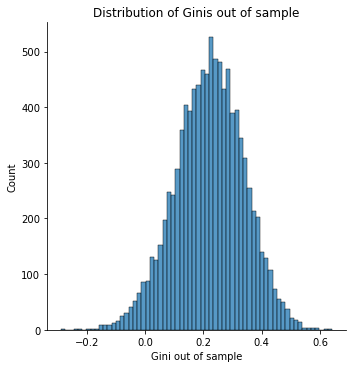

In [66]:
sns.displot(dictionary_random_test["Gini out of sample"])
plt.title("Distribution of Ginis out of sample");

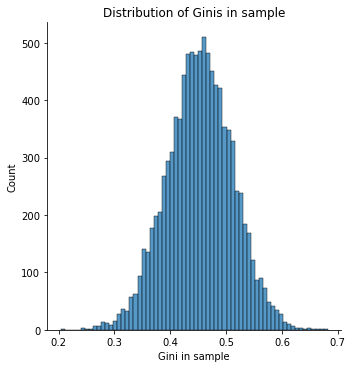

In [67]:
sns.displot(dictionary_random_test["Gini in sample"])
plt.title("Distribution of Ginis in sample");

# Random Forest Approach

In [68]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)



# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

1.0

In [69]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.06 .


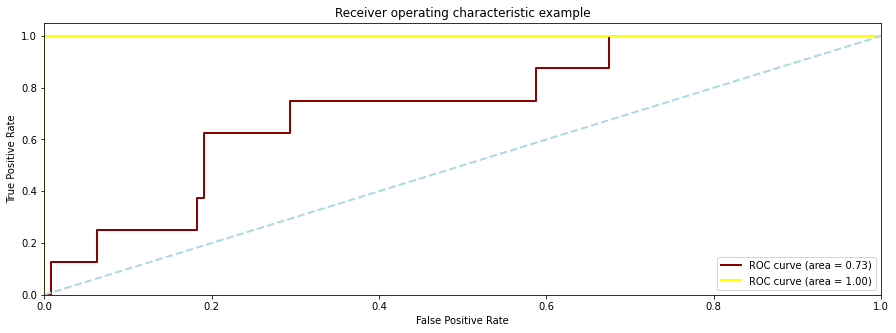

Random Forest Approach
In sample:
AUC :   1.0
GINI:  1.0
Out sample: 
AUC :   0.7261904761904762
GINI:  0.45238095238095233


In [70]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [71]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
rf.fit(train_features, train_labels, sample_weight = weights)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=2000, n_jobs=2,
                       oob_score=True, random_state=0)

# Coming to the Test Sample

In [72]:
df_test

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,cf_financing,age_num,wc_ratio,ebit_margin,profit_margin,ocf_ratio,equity_ratio,total_liabilities,debt_to_equity,roa
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,7.289467e+05,7.289467e+05,2.097214e+05,45390.50,...,-5.457891e+04,35.0,0.525518,0.062269,0.287705,0.072204,0.000000,214860.19,0.000000,0.170458
C_896,GmbH,13127,87100,1992,181.0,GKV,7.088473e+05,7.088473e+05,7.384952e+05,13017.29,...,-5.820000e-11,29.0,1.425898,0.018364,1.041825,-0.014919,0.537732,380723.43,0.859662,0.008835
C_252,GmbH,14059,86101,1993,505.0,GKV,2.602532e+07,2.601554e+07,2.202299e+07,2086104.36,...,-2.091456e+06,28.0,3.165258,0.080157,0.846214,0.109983,0.367217,4582487.49,0.333668,0.061106
C_165,GmbH,10437,87100,1995,82.0,GKV,1.105332e+06,1.105332e+06,7.174051e+05,88074.80,...,-1.160000e-10,26.0,3.911569,0.079682,0.649040,0.141362,0.790521,98099.72,0.256812,0.124279
C_856,GmbH,14943,96090,2002,22.0,GKV,5.199542e+07,5.197990e+07,4.642084e+07,5956777.13,...,-4.163971e+06,19.0,2.482512,0.114563,0.892787,0.109550,0.160017,27576629.40,4.038464,0.119625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_691,GmbH,83435,8930,1994,433.0,GKV,2.224117e+07,2.212290e+07,1.135134e+07,899393.22,...,1.124341e+06,27.0,0.734363,0.040438,0.510375,0.124799,0.037415,8211837.02,25.727209,0.071062
C_970,GmbH & Co. KG,89180,10390,1928,NaN,GKV,1.049671e+08,1.049671e+08,1.076738e+08,6771828.14,...,-1.163975e+07,93.0,1.467173,0.064514,1.025786,0.138103,0.349197,63957453.47,1.863716,0.047456
C_157,GmbH,82438,46495,1997,NaN,GKV,2.092688e+07,2.092688e+07,5.232887e+06,917317.49,...,-5.370269e+05,24.0,1.406278,0.043834,0.250056,0.026051,0.419103,4102001.75,1.386047,0.089689


In [80]:
X = df_test[['age_num','cash', 'profit_margin', 'ebit_margin', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
#X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts



In [94]:
prediction = pd.DataFrame(mdl1.predict(X))
prediction

,0
id,
C_411,0.063375
C_896,0.071999
C_252,0.042746
C_165,0.038270
C_856,0.000119
...,...
C_691,0.030093
C_970,0.000016
C_157,0.035844
